In [1]:
from IPython.display import HTML
from IPython.display import Image

### 什么是卷积？

　　理解卷积的最简单方法就是将它看作是应用于矩阵的滑动窗口函数，下图通过可视化来展示：

In [2]:
HTML('<img src="http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif">')

　　想像一下上图左边的矩阵表示黑白图像，每个输入（格子）表示一个像素，0代表黑像素，1代表白像素（对于灰度图像，通常在0到255之间）。这个滑动窗口叫做卷积核、过滤器或特征检测器。这里我们使用3 * 3的卷积核，乘以黑白图像矩阵，然后在求和。为了得到完整的卷积，通过移动卷积核对黑白矩阵上的每个像素点执行相乘操作。下面的例子，为使用卷积核的效果。

#### 使用相邻值对每个像素进行平均池化，可以对图片进行模糊操作（即平均了最大值突出特征）

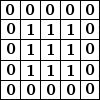

In [7]:
Image('http://docs.gimp.org/en/images/filters/examples/convolution-blur.png')

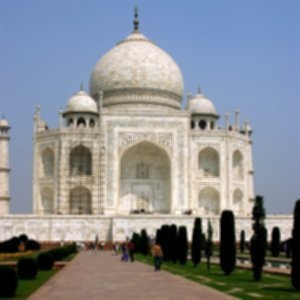

In [8]:
Image('http://docs.gimp.org/en/images/filters/examples/generic-taj-convmatrix-blur.jpg')

#### 将像素与其邻居之间的差异检测出边缘
　　为了直观地理解，考虑一下图像中平滑的部分（颜色过渡不尖锐的地方）会发生什么，像素颜色等于其邻居的颜色，结果值为0或黑色。如果在颜色强度方面存在不平滑的部分（尖锐的边缘），例如从白色到黑色的转变，则会产生较大的差异和产生的白色值），如下图所示：

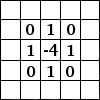

In [10]:
Image('http://docs.gimp.org/en/images/filters/examples/convolution-edge-detect1.png')

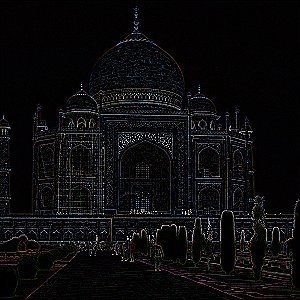

In [9]:
Image('http://docs.gimp.org/en/images/filters/examples/generic-taj-convmatrix-edge-detect.jpg')

 　　更多关于卷积核作用的例子可参考 [GIMP manual ](https://docs.gimp.org/en/plug-in-convmatrix.html)

### 什么是卷积神经网络

　　现在你知道什么是卷积，而卷积神经网络基本上是使用几层具有非线性激活函数（如ReLU或tanh）的卷积核应用的结果。在传统的前向神经网络中，我们将每个输入神经元连接到下一层中的每个输出神经元，这叫做全连接层。在卷积神经网络中，则不这样做，而是通过对输入层进行卷积操作来计算输出。这导致了在局部连接中，输入的每个区域（卷积核）都连接到输出的神经元中。每个图层应用不同的卷积核（如上图的两种卷积核，对图片作用的效果不同），通常为数百或数千个，并结合其结果。在训练阶段，卷积神经网络会根据你要学习的任务自动学习卷积核的值。举例，在图像分类中，卷积神经网络可以学习检测第一层中来自原始像素的边缘，然后使用边缘检测第二层中的简单形状，然后使用这些形状来检测更高级别的特征，例如较高级别的面部特征，最后一层则使用这些高级特征进行分类。

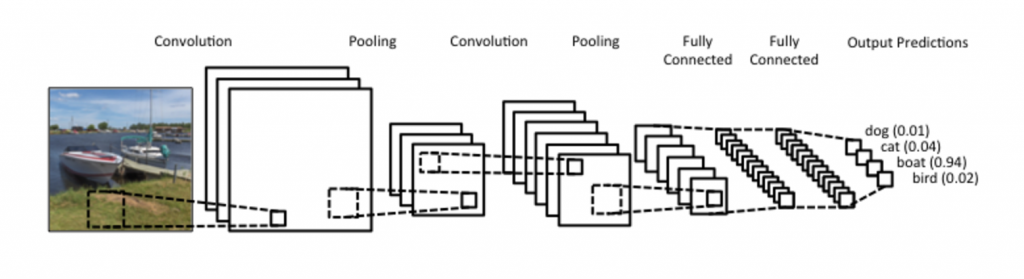

In [11]:
Image('http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-07-at-7.26.20-AM-1024x279.png')

　　这里有两个计算方面值得关注：位置不变和组合性。假设你想知道分类图像中是否有大象，在整个图像上移动卷积核时，并不关心大象会在哪里出现。在实践中，池化操作可以带来缩放、旋转、翻转的不变性，即使用池化，则不会受到图片缩放、旋转、翻转的影响。第二个关键点是局部组合性，每个卷积核通过将低级别的特征组合成高级特征表示。这就是卷积神经网络在计算机视觉强大的原因， 从直观上讲，你可以从像素、边缘形状和形状中更复杂的对象（组合卷积核得到的高级特征）来勾勒边缘。

#### 所以，该如何用于NLP

　　大多数NLP任务输入的不是图像像素，而是以矩阵表示的句子或文档。矩阵的每一行对应一个标记，通常是一个单词，但它可能是一个字符。也就是说，每一行都是表示一个单词的向量。通常，这些向量是词嵌入（word embeddings，低维表示）如word2vec和GloVe，但它们也可以是one-hot向量，即词汇表的单词索引。对于使用100维词嵌入的10个单词的句子，有10 x 100的矩阵作为输入，将其当做"图片"。<br />
　　在图像识别任务中，卷积神经网络的卷积核会扫过图像的局部区域。但在NLP任务中，把10个单词的句子，100维的词嵌入矩阵，即10 x 100当做图片，它通常使用扫过矩阵（单词）的全部行数（区域）的卷积核。因此，卷积的宽度通常与输入矩阵的宽度相同。高度，或区域大小，可能会所有不同，但通常为一次只能扫过2-5个单词以上的窗口。综上所述，NLP的卷积神经网络工作如下图：

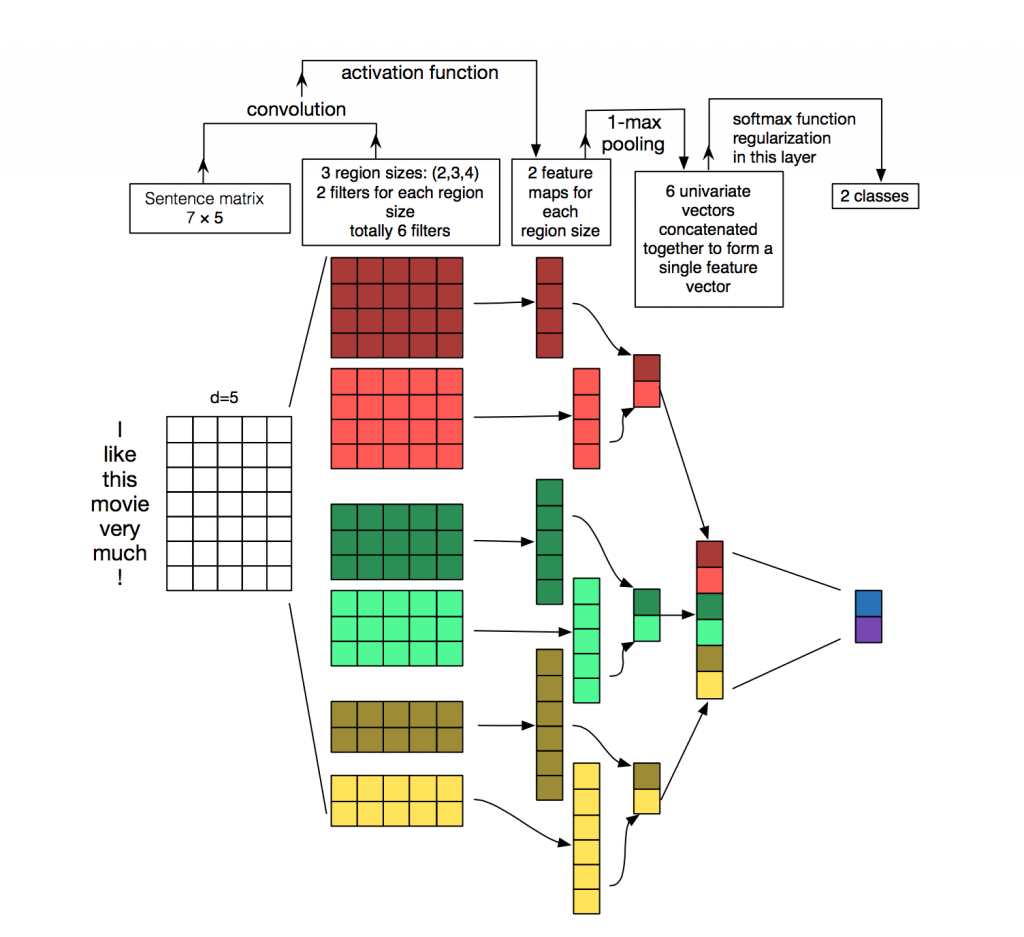

In [3]:
Image('http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-06-at-12.05.40-PM-1024x937.png')

　　上图为用于句子分类的卷积神经网络的体系结构图，使用的卷积核大小为(4, 5)，即卷积的宽度与输入矩阵的宽度相同为5。而卷积的高度为4，一次扫过4个词向量。这样卷积核扫下来，会生成3个(4, 5)的矩阵，然后使用2个卷积，则会生成6个(4, 5)的矩阵，如上图。<br />
　　在对其进行激活函数的操作，从(4, 5) -> (4, 1)。然后对每个卷积后的矩阵执行1-max池化，即选择每个矩阵的最大值，从(4, 1) -> (1, 1)。因此，从卷积后的6个矩阵中生成一个单变量的特征，并且这6个特征级联在一起作为倒数第二层的特征向量。然后最后一层使用softmax接收该输入，并用它来分类句子，这里使用的是二分类。

　　位置不变性和局部合成性为图像提供了直观意义，但对NLP来说则不那么重要。你可能会关心句子中某个词的出现，彼此靠近的像素在语义上很可能是相关（同一对象的一部分），但对单词而言，情况并非总是这样的。在许多语言中，部分短语可能被其它几个单词分开，构成方面也不明显。很明显，单词在某些方面的构成，就像修饰名词的形容词一样，但究竟是更高级的表示如何工作的，实际"意味着什么"并不像图像识别的案例那样明显。<br />
　　考虑到这一切，似乎卷积神经网络不太适合NLP任务。循环神经网络更加直观，其工作机制类似于我们如何处理语言（或者至少我们认为我们如何处理语言）: 从左到右读取。幸运的是，这并不意味着卷积神经网络不能用。所有模型是错误的（统计学的），但有些是有用的。事实证明，卷积神经网络用语NLP任务表现良好。简单的词袋模型虽然是过分简化的假设，但它仍然是多年来的标准方法，并且能带来不错的结果。<br />
　　卷积神经网络的一个论点是它很快，非常快。卷积是计算机图形的核心部分，并且在GPU上得到实现。与n-gram相比，卷积神经网络在表达方面也很有效率。在一个拥有大量词汇的词汇表中，超过3-ngram的计算将会非常耗时间。即使是google，也不会使用超过5-gram的计算。卷积核能自动学习好的表示，不需要整个词汇表的表示，使用尺寸大于5的卷积核是合理的。我认为第一层中的许多卷积核能捕捉到与n-gram相似（但不限于）的特征，并且以更紧凑的方式表示。

### 卷积神经网络超参数

#### Narrow vs. Wide convolution
　　在解释卷积时，忽略了如何使用卷积核的一些细节。在矩阵中心应用3 x 3的卷积核效果更好，但边缘该怎么处理？如何将卷积核作用于矩阵的第一个元素，它的顶端和左边都没有相邻元素？你可以使用zero-padding，所有落在矩阵外的元素的都将视为0。这样就可以使用卷积核用于输入矩阵的每个元素，并获得跟输入矩阵相同大小的或更大的输出矩阵。添加zero-padding，也叫作wide convolution（宽卷积），不使用zero-padding叫做narrow convolution（窄卷积），下图为一维的narrow convolution和wide convolution:

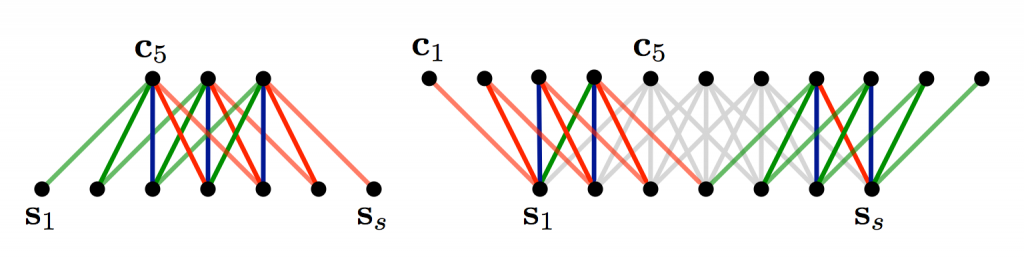

In [3]:
Image('http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-05-at-9.47.41-AM-1024x261.png')

　　当你想要一个相对于输入大小的大型卷积时，wide convolution很有用。narrow convolution输出的大小是（7-5）+1=3，而wide convolution输出的大小是（7 + 2 * 4 - 5）+ 1 = 11。总结，输出大小的公式为$n_{out} = (n_{in} + 2 * n_{padding} - n_{filter}) + 1$

#### Stride Size
　　卷积神经网络的另一个超参数是stride size，定义每次卷积核移动的步长。上面的例子中，stride size都为1。较大的stride size会导致卷积核扫过（矩阵）次数减少，输出的矩阵变小。如下图，左边为stride size=1（每隔一个像素移动卷积核），右边为stride size=2（每隔两个像素移动卷积核）

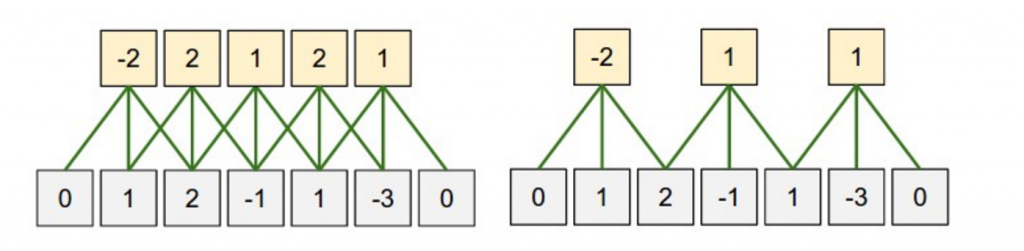

In [4]:
Image('http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-05-at-10.18.08-AM-1024x251.png')

　　在文献中通常看到stride sizes=1，但使用较大的stride sizes会建立一个类似循环神经网络的模型，即看起来像一颗数。

#### Pooling Layers

　　卷积神经网络的一个关键是池化层，通常应用于卷积层之后。池化层对卷积层的输出做欠采样，池化操作最常用的是最大池化。如下图，对2 * 2的卷积核使用最大池化，stride=2，即每次移动卷积核隔两个像素（在NLP中，通常会对整个输出应用池化，每个卷积核产生一个数字）:

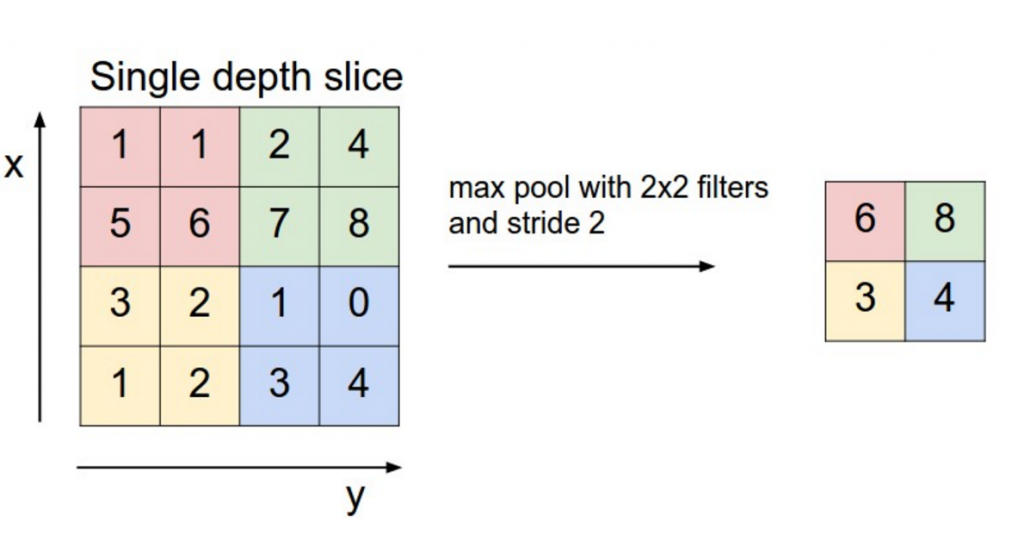

In [5]:
Image('http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-05-at-2.18.38-PM-1024x534.png')

- 池化的一个特性是它提供了一个固定大小的输出矩阵，这通常是分类所需要的。举个例子，假设你有1000个卷积核，对每个卷积核使用最大池化，会得到1000维的输出，不管卷积核大小和输入大小。这使得你可以选择不同大小的句子（sentences）、卷积核，但总能得到相同的输出维度用于分类器；
- 池化操作能减少输出的维度，并保留显著的信息。你可以认为每个卷积核检测特定的特征，比如检测句子中是否包含例如"不令人惊讶"的否定意思。如果这个短语出现在句子的某个地方，将卷积核应用于该区域会产生较大的值，但将该卷积核用于其他区域则会产生较小的值。通过使用最大池化操作，可以获得该特征是否出现在句子中的信息，与此会失去它出现在哪里的信息。但关于这个地方信息真的有用吗？是的，有点类似bag of n-grams模型做的事情。你丢失了关于位置的全局信息，但通过卷积核抓住了局部信息，比如"not amazing"和"amazing not"是非常不同的；
- 在图像识别中，池化层提供了平移和旋转的不变性。当你对一个地区进行池化操作时，即使你对一些像素进行平移和旋转操作，其输出结果也是类似的，因为最大池化操作会选取同样的最大值。

#### channels

　　最后一个概念需要明白channels（通道），channels是输入数据的不同"看法"。举例，在图像识别中，会有RGB（red, green, blue）的channels，对不同的channels使用权重相同或不同的卷积核。在NLP中，你也可以想象拥有不同的channels，为不同的词设置单独的channels进行嵌入（embeddings ）操作（举例word2vec和GloVe），或者有一个使用不同的语言表示相同句子的channel，或者用不同的方式表达。

#### 卷积神经网络用于NLP

　　对卷积神经网络来说，最适合其的任务似乎是分类任务，比如情感分析、垃圾邮件检测或邮件分类。卷积和词化操作会丢失词的局部顺序的信息，所以像词性标记和命名实体提取的序列标记类型，有点难以用卷积神经网络的架构（但不是不可能，你可以添加位置特征作为输入变量）。
　　在各种分类数据集上，评估卷积神经网络的体系架构，主要包括情感分析和主题分类任务。卷积神经网络在这些数据集上能得到很好的表现。惊讶的是，本文使用的网络非常简单，但效果却很好。输入图层是由进行word2vec操作后的词嵌入向量连接组成的句子。接下来是带有多个卷积核的卷积层，然后是池化层，最后接一层softmax分类层。本文还以静态和动态的词嵌入（word embeddings）的形式对两个不同的通道进行实验，其中一个通道在训练期间进行调整，另一个则不会。

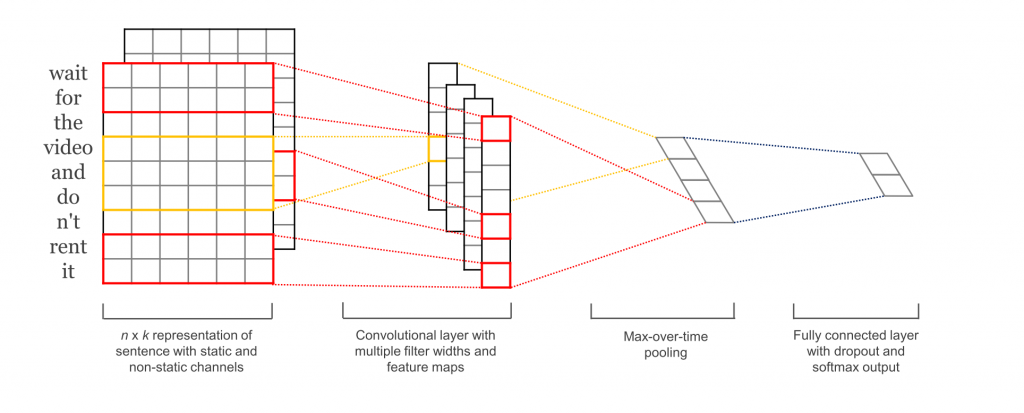

In [6]:
Image('http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-06-at-8.03.47-AM-1024x413.png')

　　建立卷积神经网络，意味着有很多参数需要选择，比如之前提到的：输入的表示形式（word2vec，GloVe，one-hot），卷积核的数量和大小，池化策略（最大化，求平均），和激活函数（ReLU、tanh）等。一些结果表明最大池化总是比平均池化的效果好，卷积核的大小是很重要的，但是与任务有关。而正则项在NLP任务中似乎没有很大的不同。